In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [39]:
# generating data
X = np.linspace(1.0, 7.0, 500)
y = 2.0 + X**2 + 5*np.random.rand(X.shape[0])
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

data = np.hstack((X, y))
data = np.hstack((np.ones((data.shape[0], 1)), data))
np.random.shuffle(data)

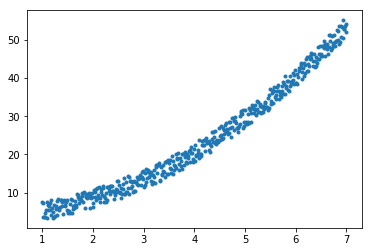

In [40]:
# visualising data
plt.scatter(data[:, 1], data[:, -1], marker = '.')
plt.show()

In [41]:
# train-test-split
split_factor = 0.85
split = int(split_factor*data.shape[0])

X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))

X_test = data[split: , :-1]
y_test = data[split:, -1].reshape((-1, 1))

In [76]:
def hypothesis(x, theta):
    return np.dot(x, theta)

def gradient(x, y, theta):
    h = hypothesis(x, theta)
    grad = np.dot(x.transpose(), (h - y))
    return grad

def distance(x, x_test):
    dist = np.sqrt(np.sum((x - x_test)**2))
    return dist

def weight(x, x_test):
    dist = distance(x, x_test)
    t = 0.5
    w = np.exp((-1.0*(dist**2)) / (2.0*(t**2)))
    return w

def plotHypothesis(x, pred, theta):
    x_plot = np.linspace(x[0, 1] - 2, x[0, 1] + 2, 5)
    y_plot = theta[0, 0] + theta[1, 0]*x_plot
    plt.plot(x_plot, y_plot)
    plt.scatter(x[0, 1], pred, color = 'red')
    plt.scatter(X_train[:, 1], y_train, marker = '.')
    plt.show()

def predict(X, y, x_test, u = 10):
    theta = np.zeros((X.shape[1], 1))
    max_itr = 100
    for itr in range(max_itr):
        temp = np.zeros(theta.shape)
        for i in range(X.shape[0]):
            x = X[i, :].reshape((1, -1))
            w = weight(x, x_test)
            temp = theta - u*w*gradient(x, y[i], theta)
        theta = temp
    pred = hypothesis(x_test, theta)
    #plotHypothesis(x_test, pred, theta)
    print(theta)
    return pred

In [78]:
for i in range(1, 2):
    x_test = X_test[i, :].reshape((1, -1))
    print(x_test)
    pred = predict(X_train, y_train, x_test)
    print(pred, y_test[i])

[[1.         1.01202405]]
[[3.79901661e-14]
 [2.11115693e-13]]
[[2.51644324e-13]] [3.55208374]
